In [ ]:
#the statistics of the eclipse data

In [104]:
import pandas as pd
import os
import json
import csv
from flatten_json import flatten
import re, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

from lifelines import KaplanMeierFitter

In [105]:
def keepVal(activity):
    if activity=='NEW'or activity=='FIXED':
        return 1
    return 0

In [106]:
#keep only changes in status
def keep(value,status):
    if status!='Resolution':
        return 1
    if value=='---':
        return 0
    return 1



In [107]:
#return the activity
def return_val(x):
    if x['What']=='Status':
        if x['Added']=='ASSIGNED':
            return 'Assignee'
        return x['Added']
        
    if x['What']=='Assignee':
        return x['What']
    if x['What']=='Resolution':
        return x['Added']
    

In [108]:
df=pd.read_csv('db\\EC3.csv')

In [109]:
dfu=df
dfg=df

In [110]:
df['creation_ts'] = pd.to_datetime(df['creation_ts'])
df['When'] = pd.to_datetime(df['When'])

In [111]:
dict1={
"4.3" : "26-6-2013 20:00:00" ,
"4.4" :  "25-6-2014 12:15:00" ,
"4.5" : "24-6-2015 20:00:00" ,
"4.6" :"22-6-2016 11:00:00",
"4.7" :  "28-6-2017 09:50:00",
"4.8" :  "27-6-2018 00:00:00"

}

In [112]:
arr=[
"4.4" ,
"4.5" ,
"4.6"  ,
"4.7",
"4.8",
 "4.9"   
]

In [113]:
arr1=[
    4.3 ,
4.4 ,
4.5 ,
4.6  ,
4.7,
4.8 
]

In [114]:

# of reported bugs before release =RBBR
# of reported bugs after release =RBAR
# of reported and  resolved bugs before release =RBRB
# of reported and fixed bugs before release =RBFB
# of reported  before release and  resolved after release =RBRA
# of reported  before release and  fixed after release =RBFA
# of reported after release and  resolved after release =RARA
# of reported  after release and fixed after release =RAFA

In [115]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    
    version= x
   # print(x,dict[x])
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & (("4.4.1"==df['version'])  | ("4.4"==df['version']))
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & ("4.4"==df['version'])
    mask= (version==df['version'])  
    #the bug before release 
    maskp = (version==df['version'])  & (df['creation_ts'] < start_date)
    #the bug after release 
    maskpp = (version==df['version'])  & (df['creation_ts'] >= start_date)

    #the bug created and resolved & before release 
    mask1 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) 
    #the bug created and fixed before release 
    mask2 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity'])  & ("FIXED"==df['resolution'])

    #the bug created before release and resolved  after release 
    mask3 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity'])
    #the bug created before release and fixed after release 
    mask4 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution']) 
    #the bug created after release  and resolved
    mask5 = (df['creation_ts'] >= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) 
    #the bug created after release  and fixed 
    mask6 = (df['creation_ts'] >= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution'])

    dff = df.loc[mask]
    dffp = df.loc[maskp]
    dffpp = df.loc[maskpp]
    dff1 = df.loc[mask1]
    dff2 = df.loc[mask2]
    dff3 = df.loc[mask3]
    dff4 = df.loc[mask4]
    dff5 = df.loc[mask5]
    dff6 = df.loc[mask6]
    id_before_release=dffp.bug_id.unique()
    id_after_release=dffpp.bug_id.unique()
    id_RBRB=dff1.bug_id.unique()
    id_RBFB=dff2.bug_id.unique()
    id_RBRA=dff3.bug_id.unique()
    id_RBFA=dff4.bug_id.unique()
    id_RARA=dff5.bug_id.unique()
    id_RAFA=dff6.bug_id.unique()
    
    TOTAL=len(dff.bug_id.unique())
    before_release=len(dffp.bug_id.unique())
    after_release=len(dffpp.bug_id.unique())
    RBRB=len(dff1.bug_id.unique())
    RBFB=len(dff2.bug_id.unique())
    RBRA=len(dff3.bug_id.unique())
    RBFA=len(dff4.bug_id.unique())
    RARA=len(dff5.bug_id.unique())
    RAFA=len(dff6.bug_id.unique())
    if before_release!=0 and RBRB!=0:
        ratio1=RBRB/before_release
        ratio2=RBFB/RBRB
    if after_release!=0 and RARA!=0:
        ratio3=RARA/after_release
        ratio4=RAFA/RARA
    data=pd.DataFrame({"version": [version] , "total":[ TOTAL] ,'before_release':[before_release], 
                       'after_release':[after_release], 'RBRB':[RBRB]
   , 'RBFB':[RBFB]
   , 'RBRA':[RBRA]
   ,'RBFA':[RBFA]
   , 'RARA':[RARA]
   , 'RAFA':[RAFA]
            , 'Ratio_R_B':[ratio1]           , 'Ratio_F_B':[ratio2]
                       , 'Ratio_R_A':[ratio3]           , 'Ratio_F_A':[ratio4]
   })
    

    tData=tData.append(data)

In [116]:
tData=tData[['version','total','before_release','after_release','RBRB','RBFB','RBRA','RBFA','RARA','RAFA', 'Ratio_R_B', 'Ratio_F_B', 'Ratio_R_A'    , 'Ratio_F_A']]

In [117]:
tData

,version,total,before_release,after_release,RBRB,RBFB,RBRA,RBFA,RARA,RAFA,Ratio_R_B,Ratio_F_B,Ratio_R_A,Ratio_F_A
0,4.3,2545,1626,919,869,660,363,248,611,436,0.534440,0.759494,0.664853,0.713584
0,4.4,3947,2808,1139,1722,1287,392,244,731,478,0.613248,0.747387,0.641791,0.653899
0,4.5,2392,1508,884,755,522,244,167,626,483,0.500663,0.691391,0.708145,0.771565
0,4.6,2907,1501,1406,828,682,275,203,909,686,0.551632,0.823671,0.646515,0.754675
0,4.7,2832,2009,823,1315,1095,250,193,655,570,0.654555,0.832700,0.795869,0.870229
0,4.8,2154,1790,364,1230,1054,123,100,202,136,0.687151,0.856911,0.554945,0.673267


In [118]:
allD=pd.DataFrame()

In [119]:
allD['version']=tData['version']
allD['Total_before_release']=tData['before_release']
allD['Total_after_release']=tData['after_release']
allD['Ratio_Resolved_before']=tData['Ratio_R_B']
allD['Ratio_Fixed_before']=tData['Ratio_F_B']
allD['Ratio_Resolved_after']=tData['Ratio_R_A']
allD['Ratio_Fixed_after']=tData['Ratio_F_A']


In [120]:
allD

,version,Total_before_release,Total_after_release,Ratio_Resolved_before,Ratio_Fixed_before,Ratio_Resolved_after,Ratio_Fixed_after
0,4.3,1626,919,0.534440,0.759494,0.664853,0.713584
0,4.4,2808,1139,0.613248,0.747387,0.641791,0.653899
0,4.5,1508,884,0.500663,0.691391,0.708145,0.771565
0,4.6,1501,1406,0.551632,0.823671,0.646515,0.754675
0,4.7,2009,823,0.654555,0.832700,0.795869,0.870229
0,4.8,1790,364,0.687151,0.856911,0.554945,0.673267


In [94]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = '25-09-2014 12:00:00'
    version= x
    date_time_obj = datetime.datetime.strptime(start_date, '%d-%m-%Y %H:%M:%S')
    rem=[0]
    for i in range(12):
        
            k=date_time_obj + timedelta(30*i)
            l=date_time_obj + timedelta(30*(i+1))
            mask= (version==df['version'])  
    #the bug before release 
            maskp = (version==df['version'])  & (df['creation_ts'] < start_date) 
    #the bug after release 
            maskpp = (version==df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l)


    #the bug created and resolved & before release 
            mask1 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) 
    #the bug created and fixed before release 
            mask2 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity'])  & ("FIXED"==df['resolution'])

    #the bug created before release and resolved  after release 
            mask3 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity'])
    #the bug created before release and fixed after release 
            mask4 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution']) 
    #the bug created after release  and resolved
            mask5 = (version==df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ("RESOLVED"==df['activity']) & (df['When'] <l )
              #the bug created after release  and not rresolved 
            mask7 = (version==df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ((("RESOLVED"==df['activity']) & (df['When'] >l )) |  (df['resolution'].isnull()))
   
    #the bug created after release  and fixed 
            mask6 = (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution'])

            dff = df.loc[mask]
            dffp = df.loc[maskp]
            dffpp = df.loc[maskpp]
            dff1 = df.loc[mask1]
            dff2 = df.loc[mask2]
            dff3 = df.loc[mask3]
            dff4 = df.loc[mask4]
            dff5 = df.loc[mask5]
            dff6 = df.loc[mask6]
            dff7 = df.loc[mask7]
            id_before_release=dffp.bug_id.unique()
            id_after_release=dffpp.bug_id.unique()
            id_RBRB=dff1.bug_id.unique()
            id_RBFB=dff2.bug_id.unique()
            id_RBRA=dff3.bug_id.unique()
            id_RBFA=dff4.bug_id.unique()
            id_RARA=dff5.bug_id.unique()
            id_RAFA=dff6.bug_id.unique()
            id_RANRA=dff7.bug_id.unique()
    
            TOTAL=len(dff.bug_id.unique())
            before_release=len(dffp.bug_id.unique())
            after_release=len(dffpp.bug_id.unique())
            RBRB=len(dff1.bug_id.unique())
            RBFB=len(dff2.bug_id.unique())
            RBRA=len(dff3.bug_id.unique())
            RBFA=len(dff4.bug_id.unique())
            RARA=len(dff5.bug_id.unique())
            RAFA=len(dff6.bug_id.unique())
            RANRA=len(dff7.bug_id.unique())
            if before_release!=0 and RBRB!=0:
                    ratio1=RBRB/before_release
                    ratio2=RBFB/RBRB
            if after_release!=0 and RARA!=0:
                    ratio3=RARA/after_release
                    ratio4=RAFA/RARA
            if after_release!=0 and RARA!=0:
                    ratio5=RARA/(after_release+rem[i])
            rem.insert(i+1, after_release+rem[i]-RARA) 
            #print(after_release,ratio5)
            data=pd.DataFrame({"version": [version] , "total":[ TOTAL] ,'before_release':[before_release], 
                       'after_release':[after_release],
    'RARA':[RARA]
             , 'Ratio_R_A':[ratio5], "month":i+1 
   })
    

            tData=tData.append(data)
    #break

In [95]:
#tData
tData.to_csv('RQ1\\evol1.csv',index=False)

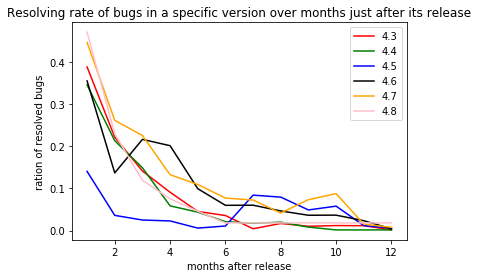

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('RQ1\\evol1.csv')
ci=0
colors=['red','green','blue','black','orange','pink']
for v in arr1:
# gca stands for 'get current axis'
    
    ax = plt.gca()
    value=data[data['version']==v]
    value.plot(kind='line',x='month',y='Ratio_R_A', color=colors[ci],ax=ax, label=v)
    ci=ci+1
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months after release')
plt.ylabel('ration of resolved bugs')
plt.title('Resolving rate of bugs in a specific version over months just after its release')
plt.show()

In [101]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
rem=[0]
c=-1
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = '25-09-2014 12:00:00'
    version= x
    date_time_obj = datetime.datetime.strptime(start_date, '%d-%m-%Y %H:%M:%S')
    temp=rem[-1]
    #print(temp)
    rem= [temp]
   
    c=c+1
   # print(c)
    for i in range(12):
        
            k=date_time_obj + timedelta(30*i)
            l=date_time_obj + timedelta(30*(i+1))
   # print(x,dict[x])
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & (("4.4.1"==df['version'])  | ("4.4"==df['version']))
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & ("4.4"==df['version'])
            mask= (version==df['version'])  
    #the bug before release 
            maskp = (version==df['version'])  & (df['creation_ts'] < start_date) 
    #the bug after release 
            maskpp = (arr[c]!=df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l)


    #the bug created and resolved & before release 
            mask1 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) 
    #the bug created and fixed before release 
            mask2 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity'])  & ("FIXED"==df['resolution'])

    #the bug created before release and resolved  after release 
            mask3 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity'])
    #the bug created before release and fixed after release 
            mask4 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution']) 
    #the bug created after release  and resolved
            mask5 = (arr[c]!=df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ("RESOLVED"==df['activity']) & (df['When'] <l )
              #the bug created after release  and not rresolved 
            mask7 = (arr[c]!=df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ((("RESOLVED"==df['activity']) & (df['When'] >=l )) |  (df['resolution'].isnull()))
   
    #the bug created after release  and fixed 
            mask6 = (df['creation_ts'] >= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution'])

            dff = df.loc[mask]
            dffp = df.loc[maskp]
            dffpp = df.loc[maskpp]
            dff1 = df.loc[mask1]
            dff2 = df.loc[mask2]
            dff3 = df.loc[mask3]
            dff4 = df.loc[mask4]
            dff5 = df.loc[mask5]
            dff6 = df.loc[mask6]
            dff7 = df.loc[mask7]
            id_before_release=dffp.bug_id.unique()
            id_after_release=dffpp.bug_id.unique()
            id_RBRB=dff1.bug_id.unique()
            id_RBFB=dff2.bug_id.unique()
            id_RBRA=dff3.bug_id.unique()
            id_RBFA=dff4.bug_id.unique()
            id_RARA=dff5.bug_id.unique()
            id_RAFA=dff6.bug_id.unique()
            id_RANRA=dff7.bug_id.unique()
    
            TOTAL=len(dff.bug_id.unique())
            before_release=len(dffp.bug_id.unique())
            after_release=len(dffpp.bug_id.unique())
            RBRB=len(dff1.bug_id.unique())
            RBFB=len(dff2.bug_id.unique())
            RBRA=len(dff3.bug_id.unique())
            RBFA=len(dff4.bug_id.unique())
            RARA=len(dff5.bug_id.unique())
            RAFA=len(dff6.bug_id.unique())
            RANRA=len(dff7.bug_id.unique())
            if before_release!=0 and RBRB!=0:
                    ratio1=RBRB/before_release
                    ratio2=RBFB/RBRB
            if after_release!=0 and RARA!=0:
                    ratio3=RARA/after_release
                    ratio4=RAFA/RARA
            if after_release!=0 and RARA!=0:
                    ratio5=RARA/(after_release+rem[i])
                    #print(rem[i],after_release,RARA)
            rem.insert(i+1, after_release+rem[i]-RARA) 
            #print(rem[i])
            data=pd.DataFrame({"version": [version] , "total":[ TOTAL] ,'before_release':[before_release], 
                       'after_release':[after_release],
    'RARA':[RARA]
             , 'Ratio_R_A':[ratio5], "month":i+1 
   })
    

            tData=tData.append(data)
    #break

In [98]:
#tData
tData.to_csv('RQ1\\evol2.csv',index=False)

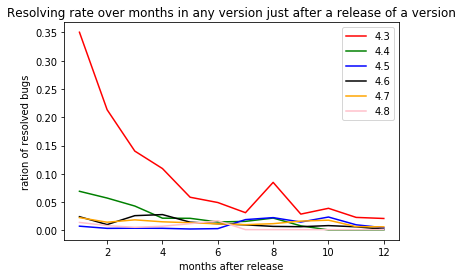

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('RQ1\\evol2.csv')
ci=0
colors=['red','green','blue','black','orange','pink']
for v in arr1:
# gca stands for 'get current axis'
    
    ax = plt.gca()
    value=data[data['version']==v]
    value.plot(kind='line',x='month',y='Ratio_R_A', color=colors[ci],ax=ax, label=v)
    ci=ci+1
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months after release')
plt.ylabel('ration of resolved bugs')
plt.title('Resolving rate over months in any version just after a release of a version')
plt.show()
